# Imports

In [4]:
# Torch
import torch

# Utils

from src.algos.trpo import (
    get_exp_envs,
    plot_rewards_and_actions,
    train_policy,
    create_probabilistic_policy,
    create_critic,
    sample_data,
    create_replay_buffer,
    create_loss_module,
    GeneralLogger,
    TrustRegion
)

# Create training and validation environments

In [5]:
data_path = 'data/naive_2_buildings_simple/'
reward = 'weighted_cost_emissions'
seed = 0
day_count = 1
personal_encoding = False
# device = 'cpu'
device = 'cuda'
gpu_device_ix = 2

train_env, eval_env, device = get_exp_envs(
    data_path=data_path,
    reward=reward,
    seed=seed,
    day_count=day_count,
    device=device,
    gpu_device_ix=gpu_device_ix,
    personal_encoding=personal_encoding
)


# TRPO Training

In [ ]:
# Sampling
days_per_iter = 2000
frames_per_batch = days_per_iter * 24  # Number of team frames collected per training iteration
n_iters = 10  # Number of sampling and training iterations
total_frames = frames_per_batch * n_iters

# Training
days_per_batch = 2000  # Number of days per training iteration
minibatch_size = days_per_batch * 24  # Size of the mini-batches in each optimization step
max_grad_norm = 1.0  # Maximum norm for the gradients
num_epochs_policy = 5  # Number of optimization steps per training iteration for policy
num_epochs_critic = 10  # Number of optimization steps per training iteration for the critic
lr = 1e-4  # Learning rate for the critic

# TRPO
gamma = 1  # discount factor
lmbda = 1  # lambda for generalised advantage estimation
entropy_eps = 1e-4  # coefficient of the entropy term in the PPO loss

# Networks configurations

share_parameters_policy = True
share_parameters_critic = True
multi_agent_ppo = True
group_features = True

# Create networks
policy = create_probabilistic_policy(
    train_env, share_parameters_policy=share_parameters_policy, device=device, group_features=group_features
)
critic = create_critic(
    train_env, share_parameters_critic=share_parameters_critic, mappo=multi_agent_ppo, device=device, group_features=group_features
)

# Create replay buffer
replay_buffer = create_replay_buffer(frames_per_batch, device, minibatch_size)

# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

# Confiure logger

logger = GeneralLogger()
logger.setup(
    config={
        "wdb_log": False,
        "csv_log": True,
        "console_log": False,
        "exp_config": {},
    }
)

# Train policy

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=n_iters,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 0, reward_mean: 0, eval_reward_mean: 0:   0%|          | 0/10 [00:00<?, ?it/s]

episode: 7, reward_mean: -1.6041150093078613, eval_reward_mean: -1.6092902421951294:  80%|████████  | 8/10 [1:33:22<23:10, 695.19s/it]

### Plot results

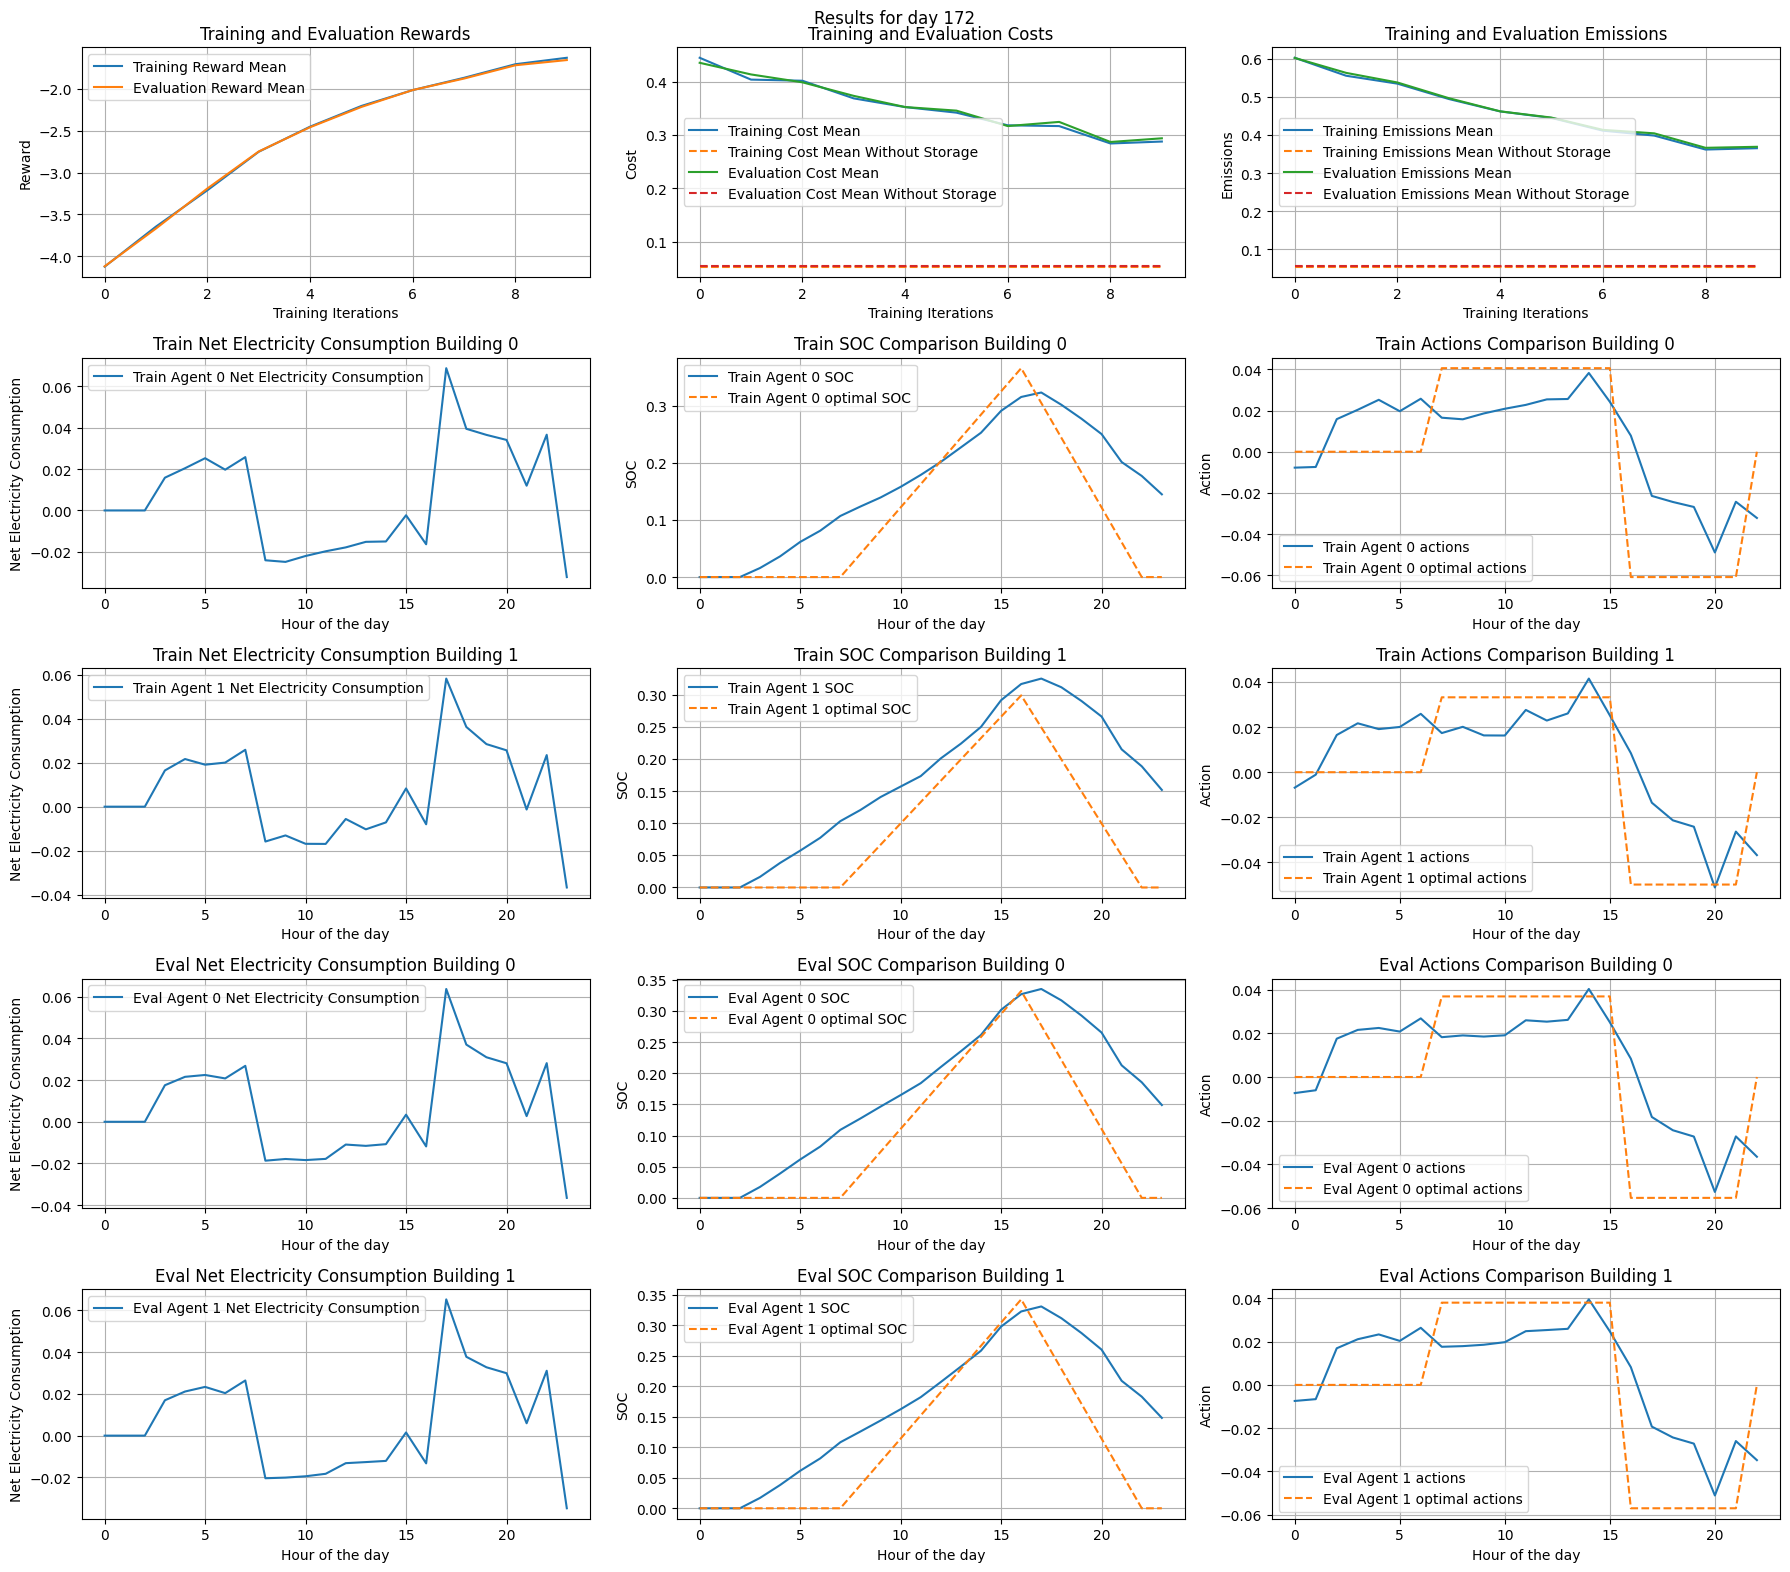

In [6]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [6]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=10,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 9, reward_mean: -0.8324686288833618, eval_reward_mean: -0.8433538675308228: 100%|██████████| 10/10 [1:03:33<00:00, 381.34s/it]


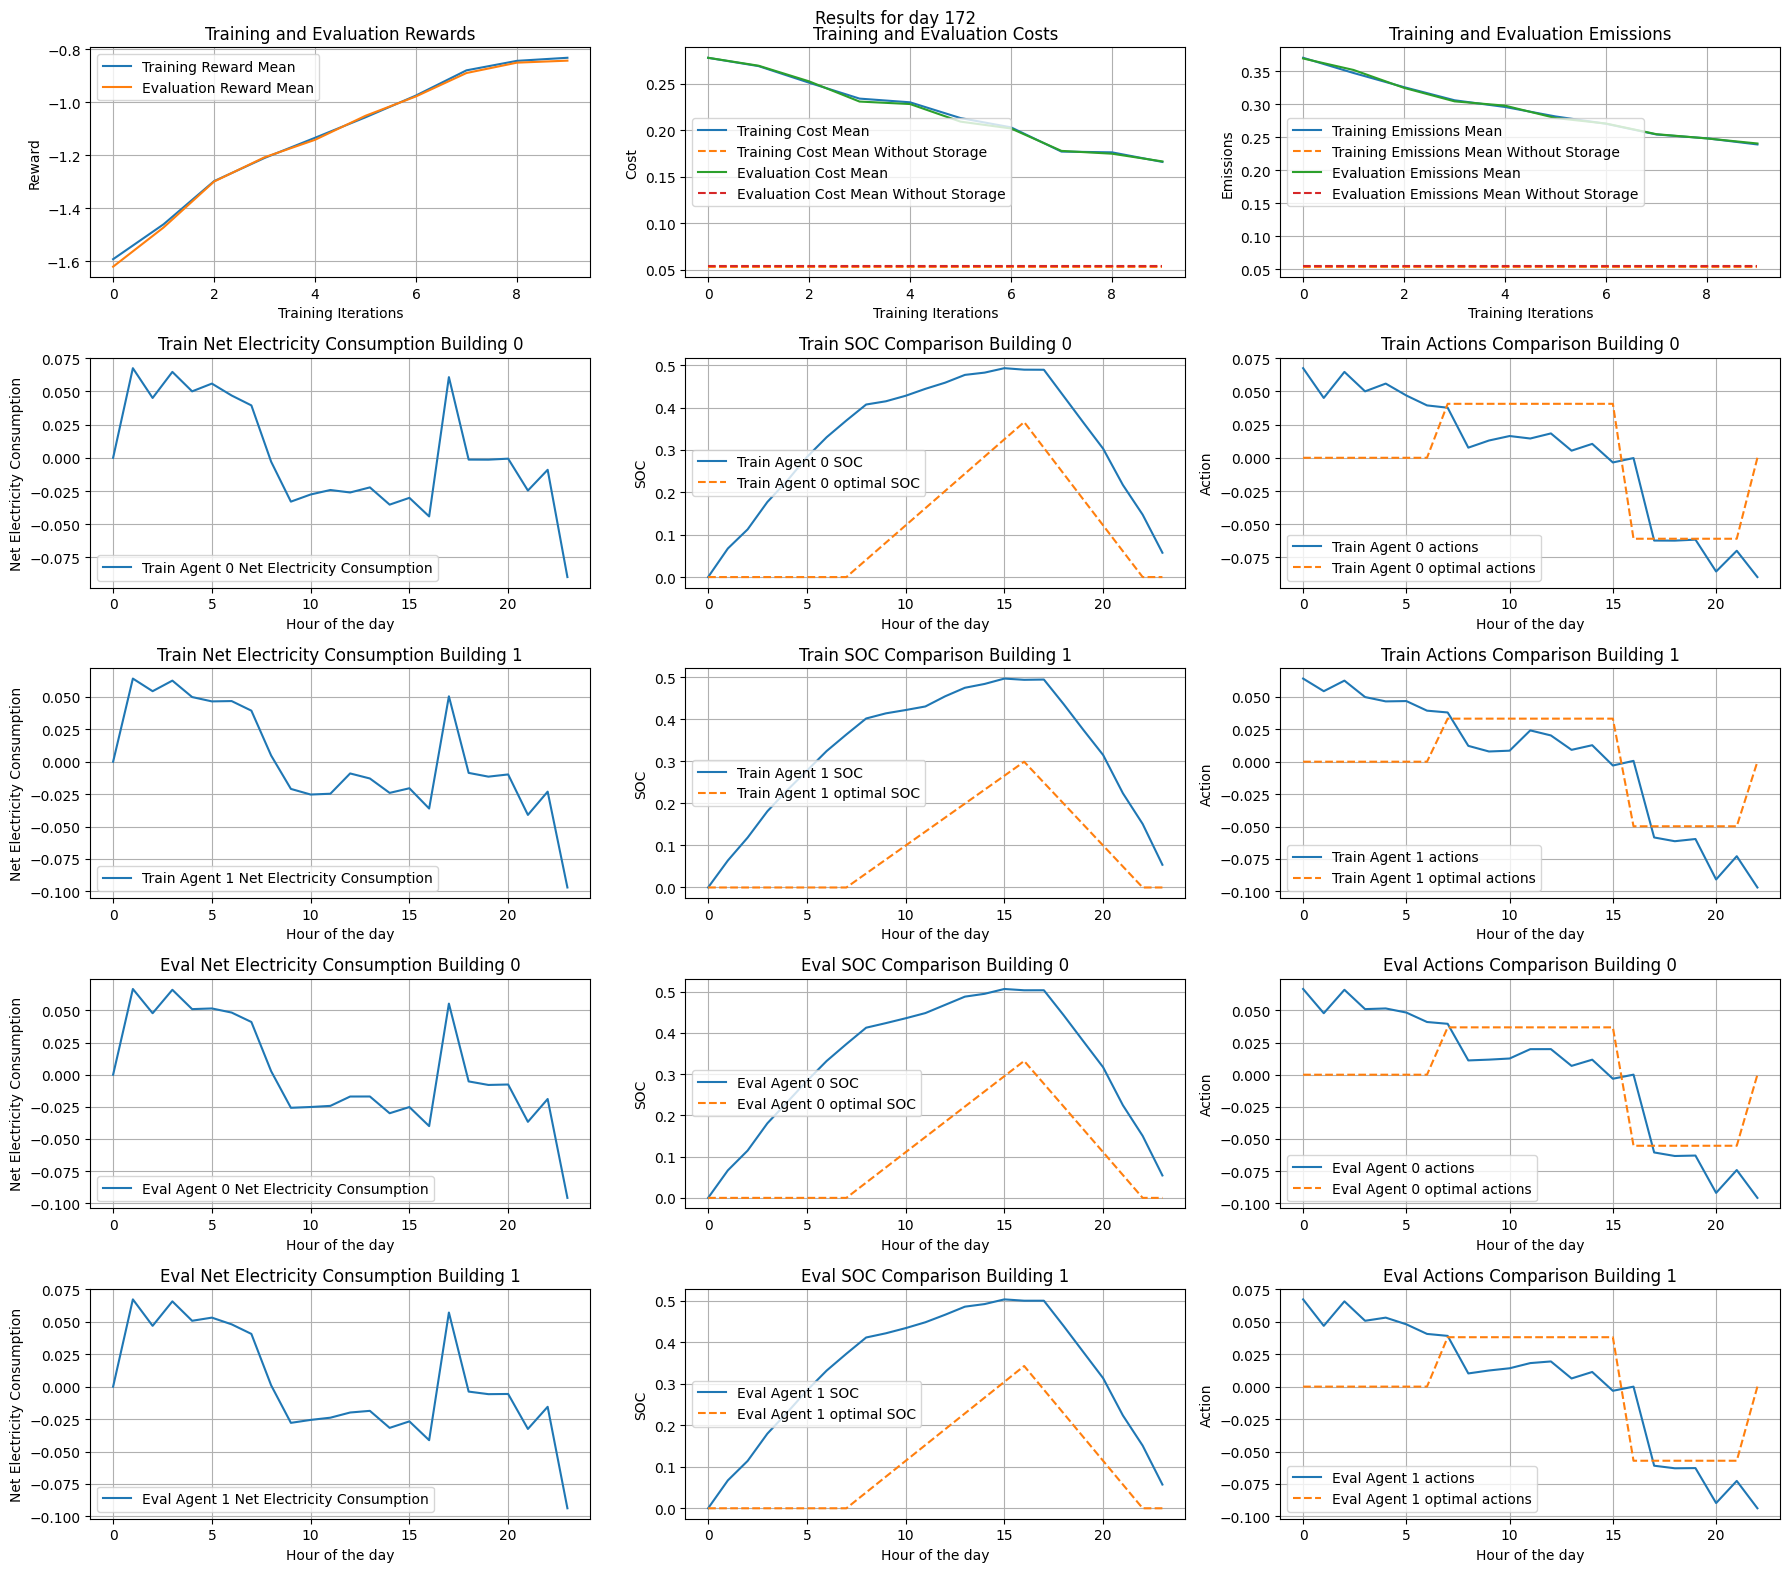

In [7]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [9]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=10,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 0, reward_mean: 0, eval_reward_mean: 0:   0%|          | 0/10 [00:00<?, ?it/s]

episode: 9, reward_mean: -0.5453575849533081, eval_reward_mean: -0.5542343258857727: 100%|██████████| 10/10 [1:00:00<00:00, 360.03s/it]


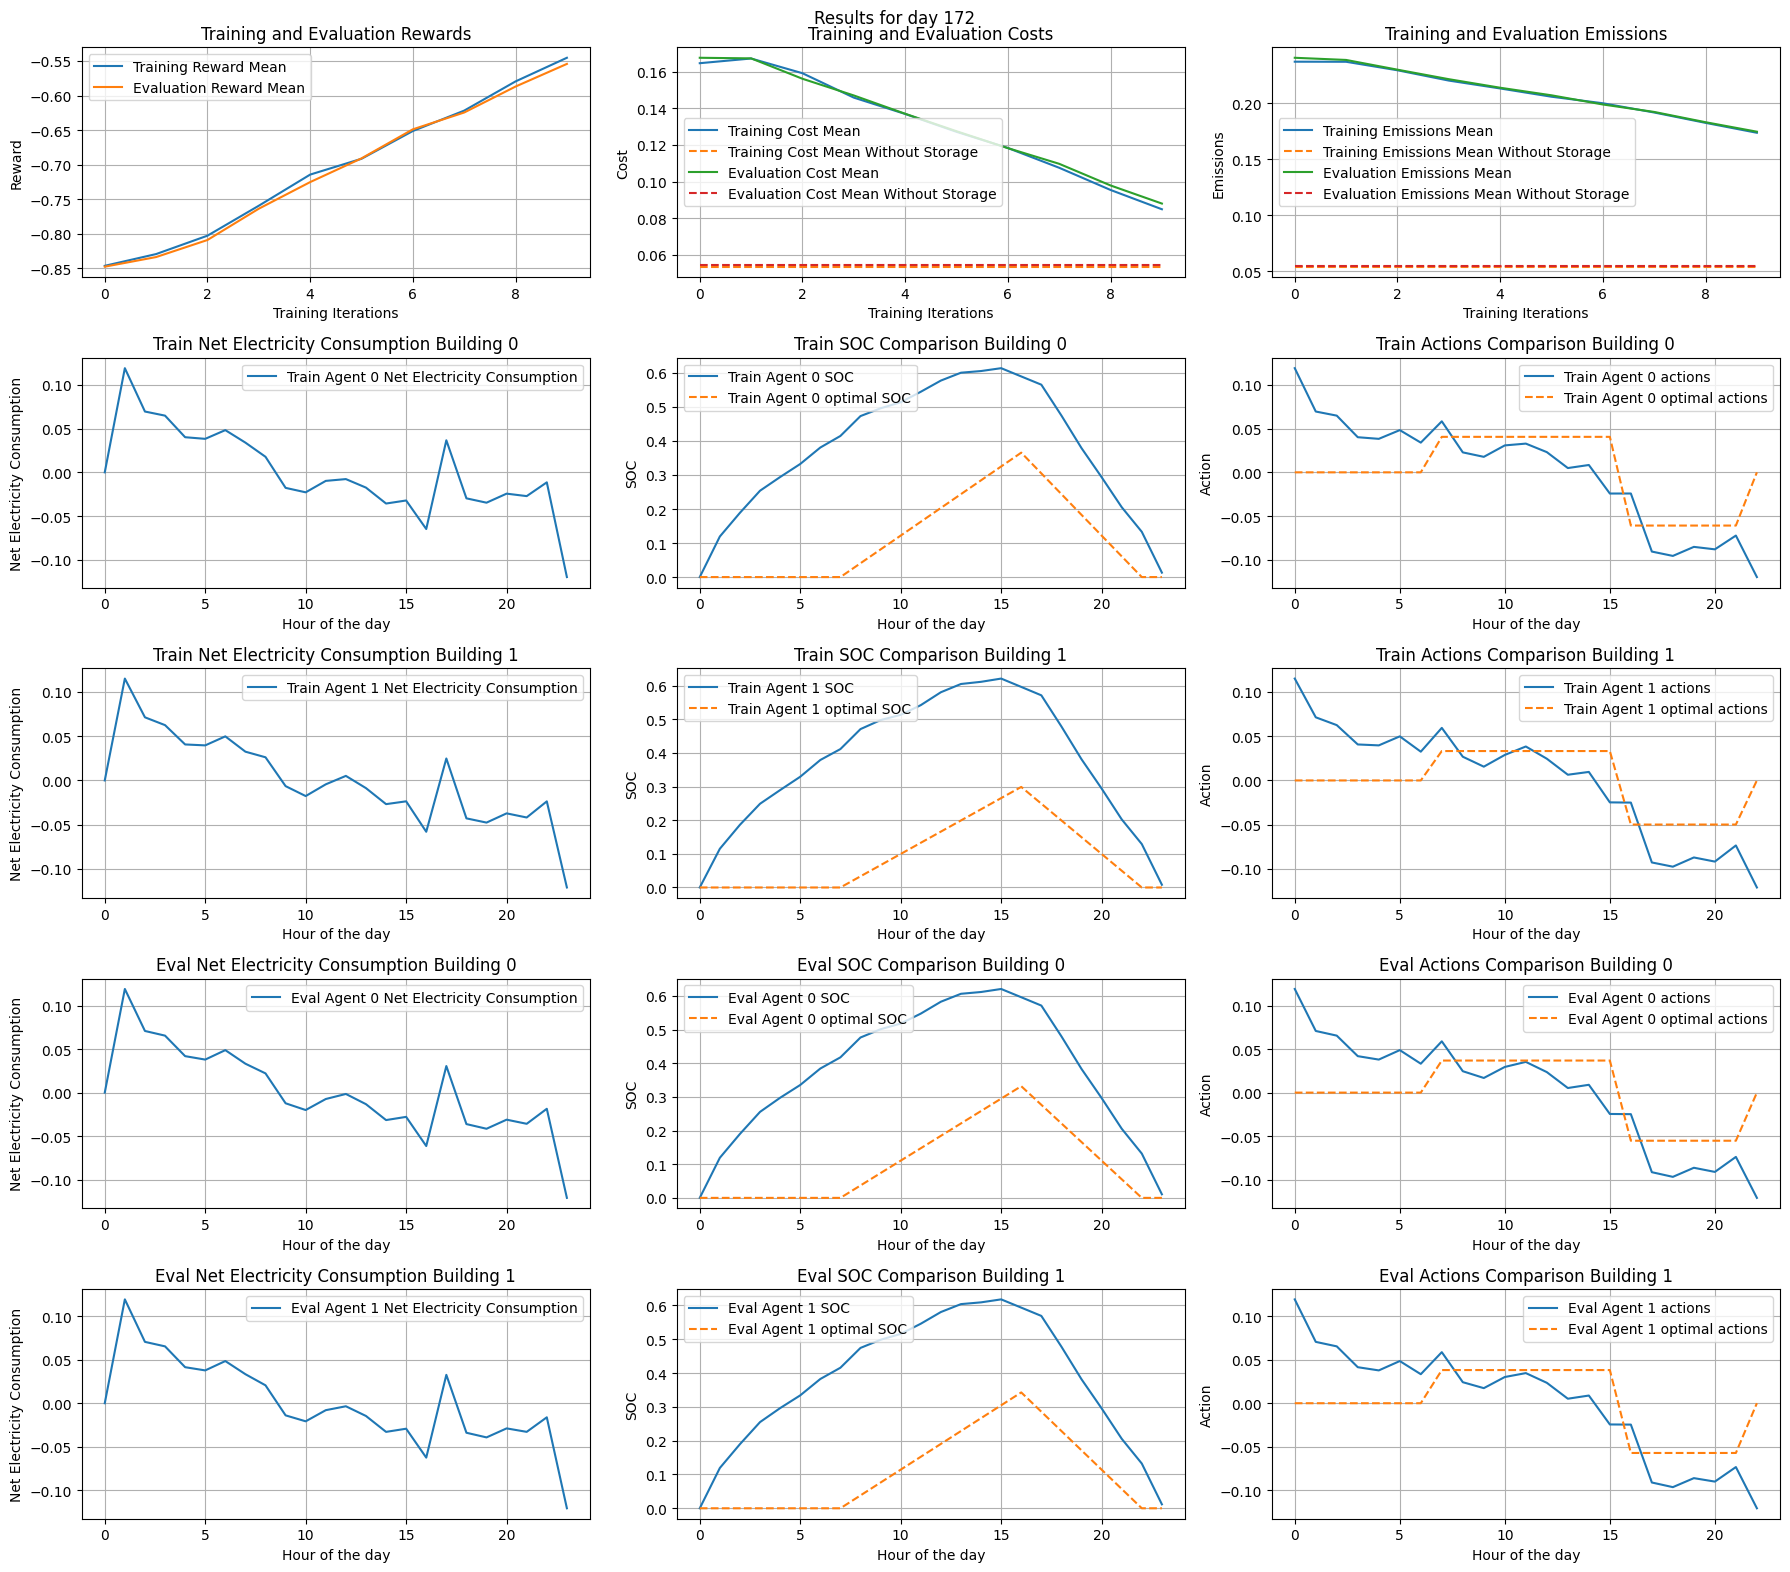

In [10]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [12]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=20,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 19, reward_mean: -0.32552558183670044, eval_reward_mean: -0.32735586166381836: 100%|██████████| 20/20 [1:53:18<00:00, 339.94s/it]


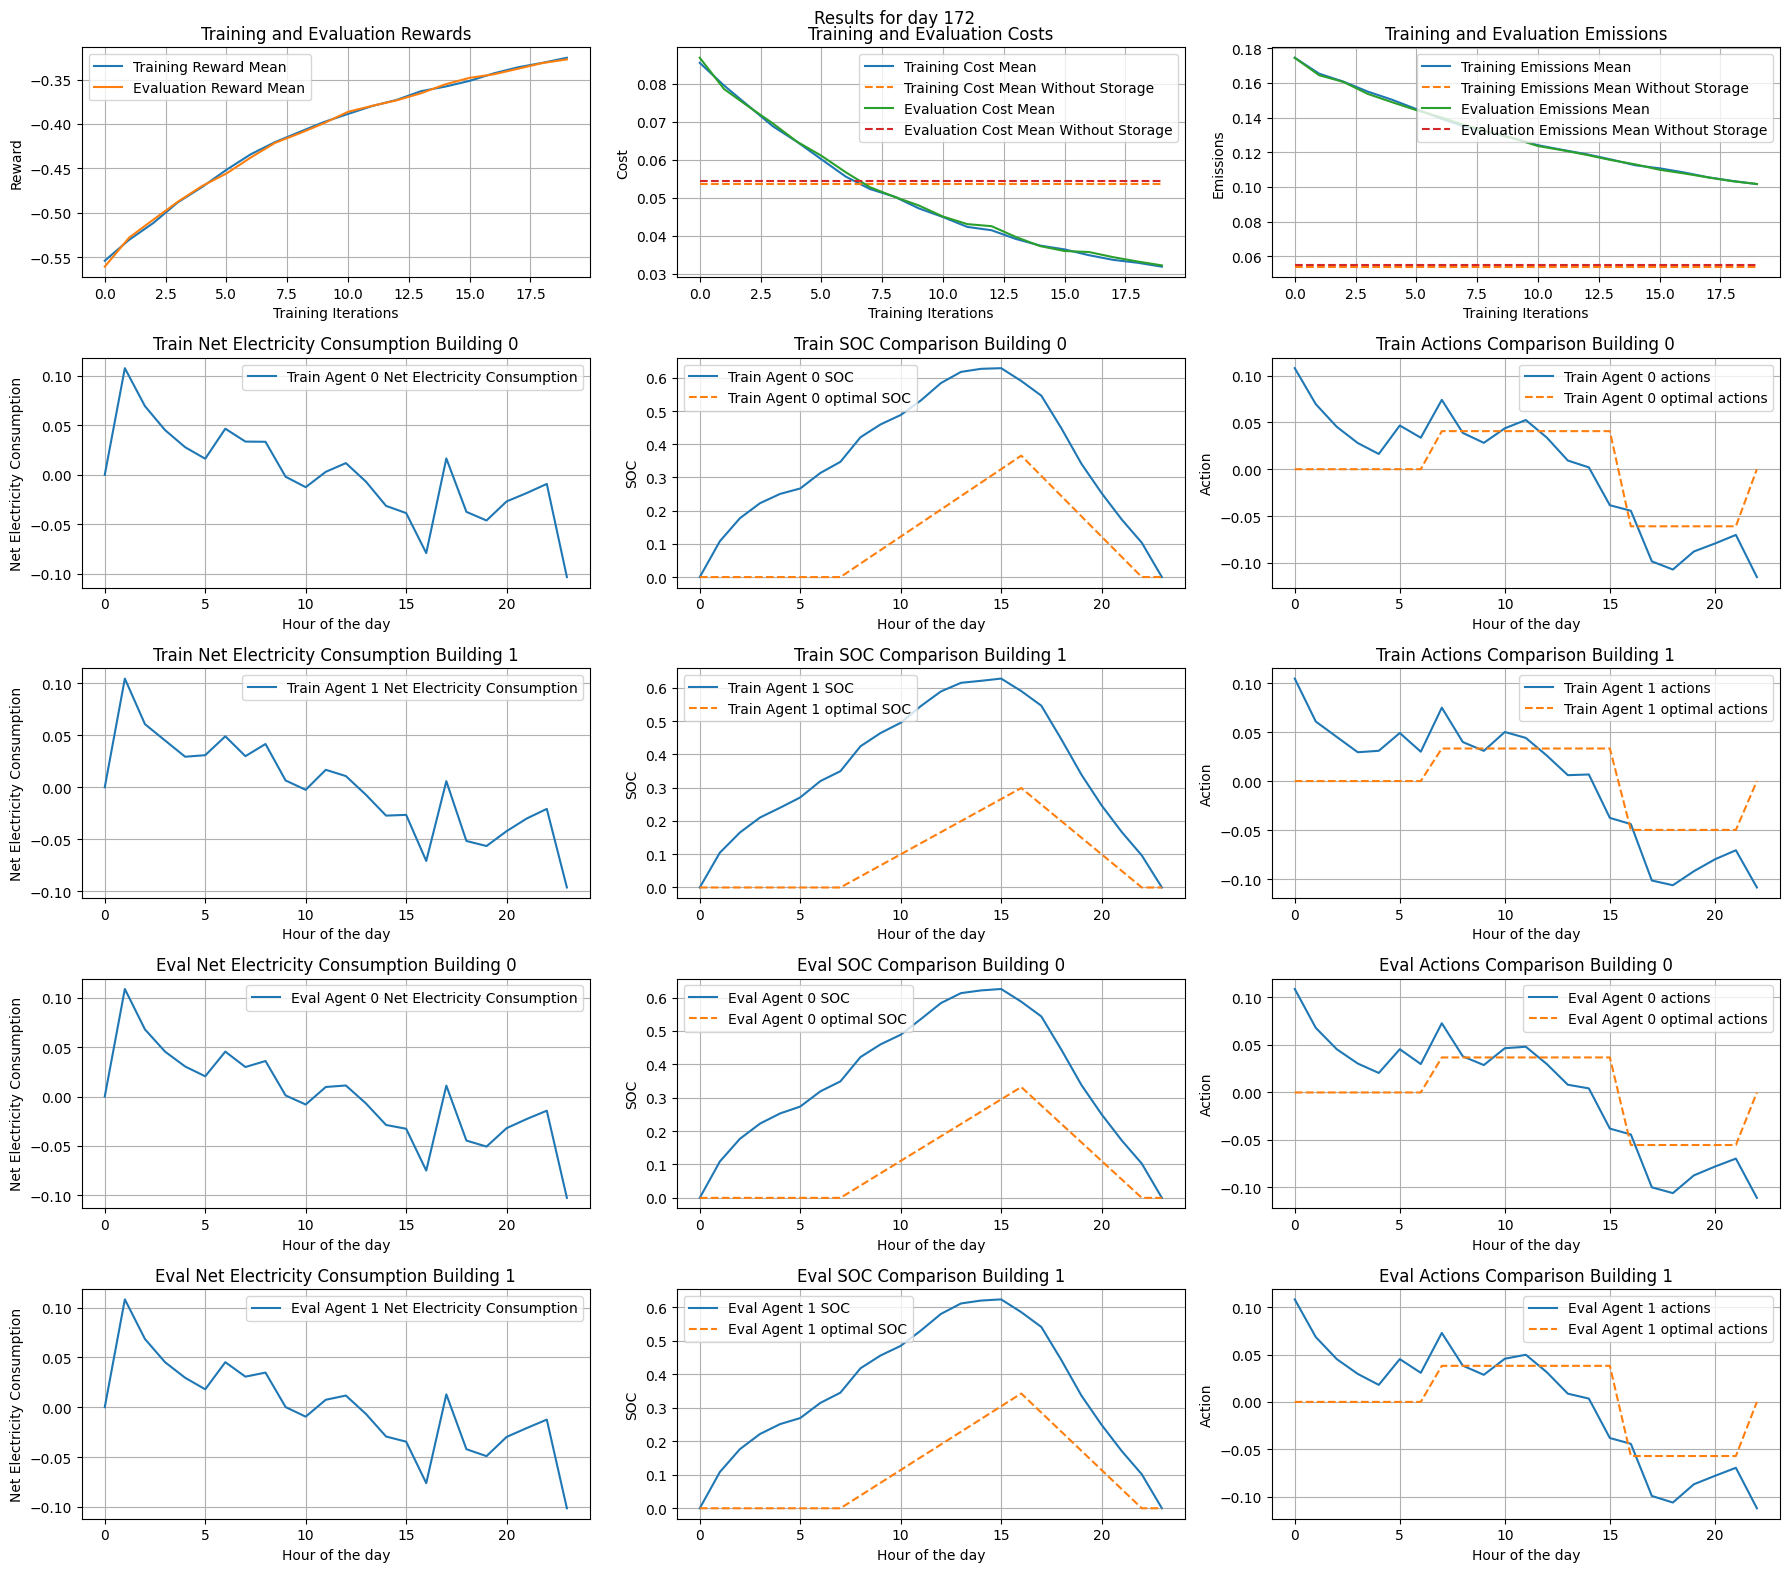

In [13]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [ ]:
# Create loss module
loss_module = create_loss_module(policy, critic, train_env, gamma, lmbda)

# Create optimizers
optim_policy = TrustRegion(
    loss_module.actor_network.parameters(), max_trust_radius=2, initial_trust_radius=.005,
    eta=0.15, kappa_easy=0.01, max_newton_iter=150, max_krylov_dim=150,
    lanczos_tol=1e-5, gtol=1e-05, hutchinson_approx=True,
    opt_method='krylov'
)
optim_critic = torch.optim.Adam(params=loss_module.parameters(), lr=lr)

policy, summary = train_policy(
    env=train_env,
    policy=policy,
    eval_env=eval_env,
    n_iters=20,
    loss_module=loss_module,
    replay_buffer=replay_buffer,
    local_epochs_policy=num_epochs_policy,
    local_epochs_critic=num_epochs_critic,
    frames_per_batch=frames_per_batch,
    minibatch_size=minibatch_size,
    max_grad_norm=max_grad_norm,
    optim_policy=optim_policy,
    optim_critic=optim_critic,
    logger=logger,
)

episode: 0, reward_mean: 0, eval_reward_mean: 0:   0%|          | 0/20 [00:00<?, ?it/s]

episode: 15, reward_mean: -0.2782958447933197, eval_reward_mean: -0.27654069662094116:  80%|████████  | 16/20 [1:33:08<23:54, 358.52s/it]

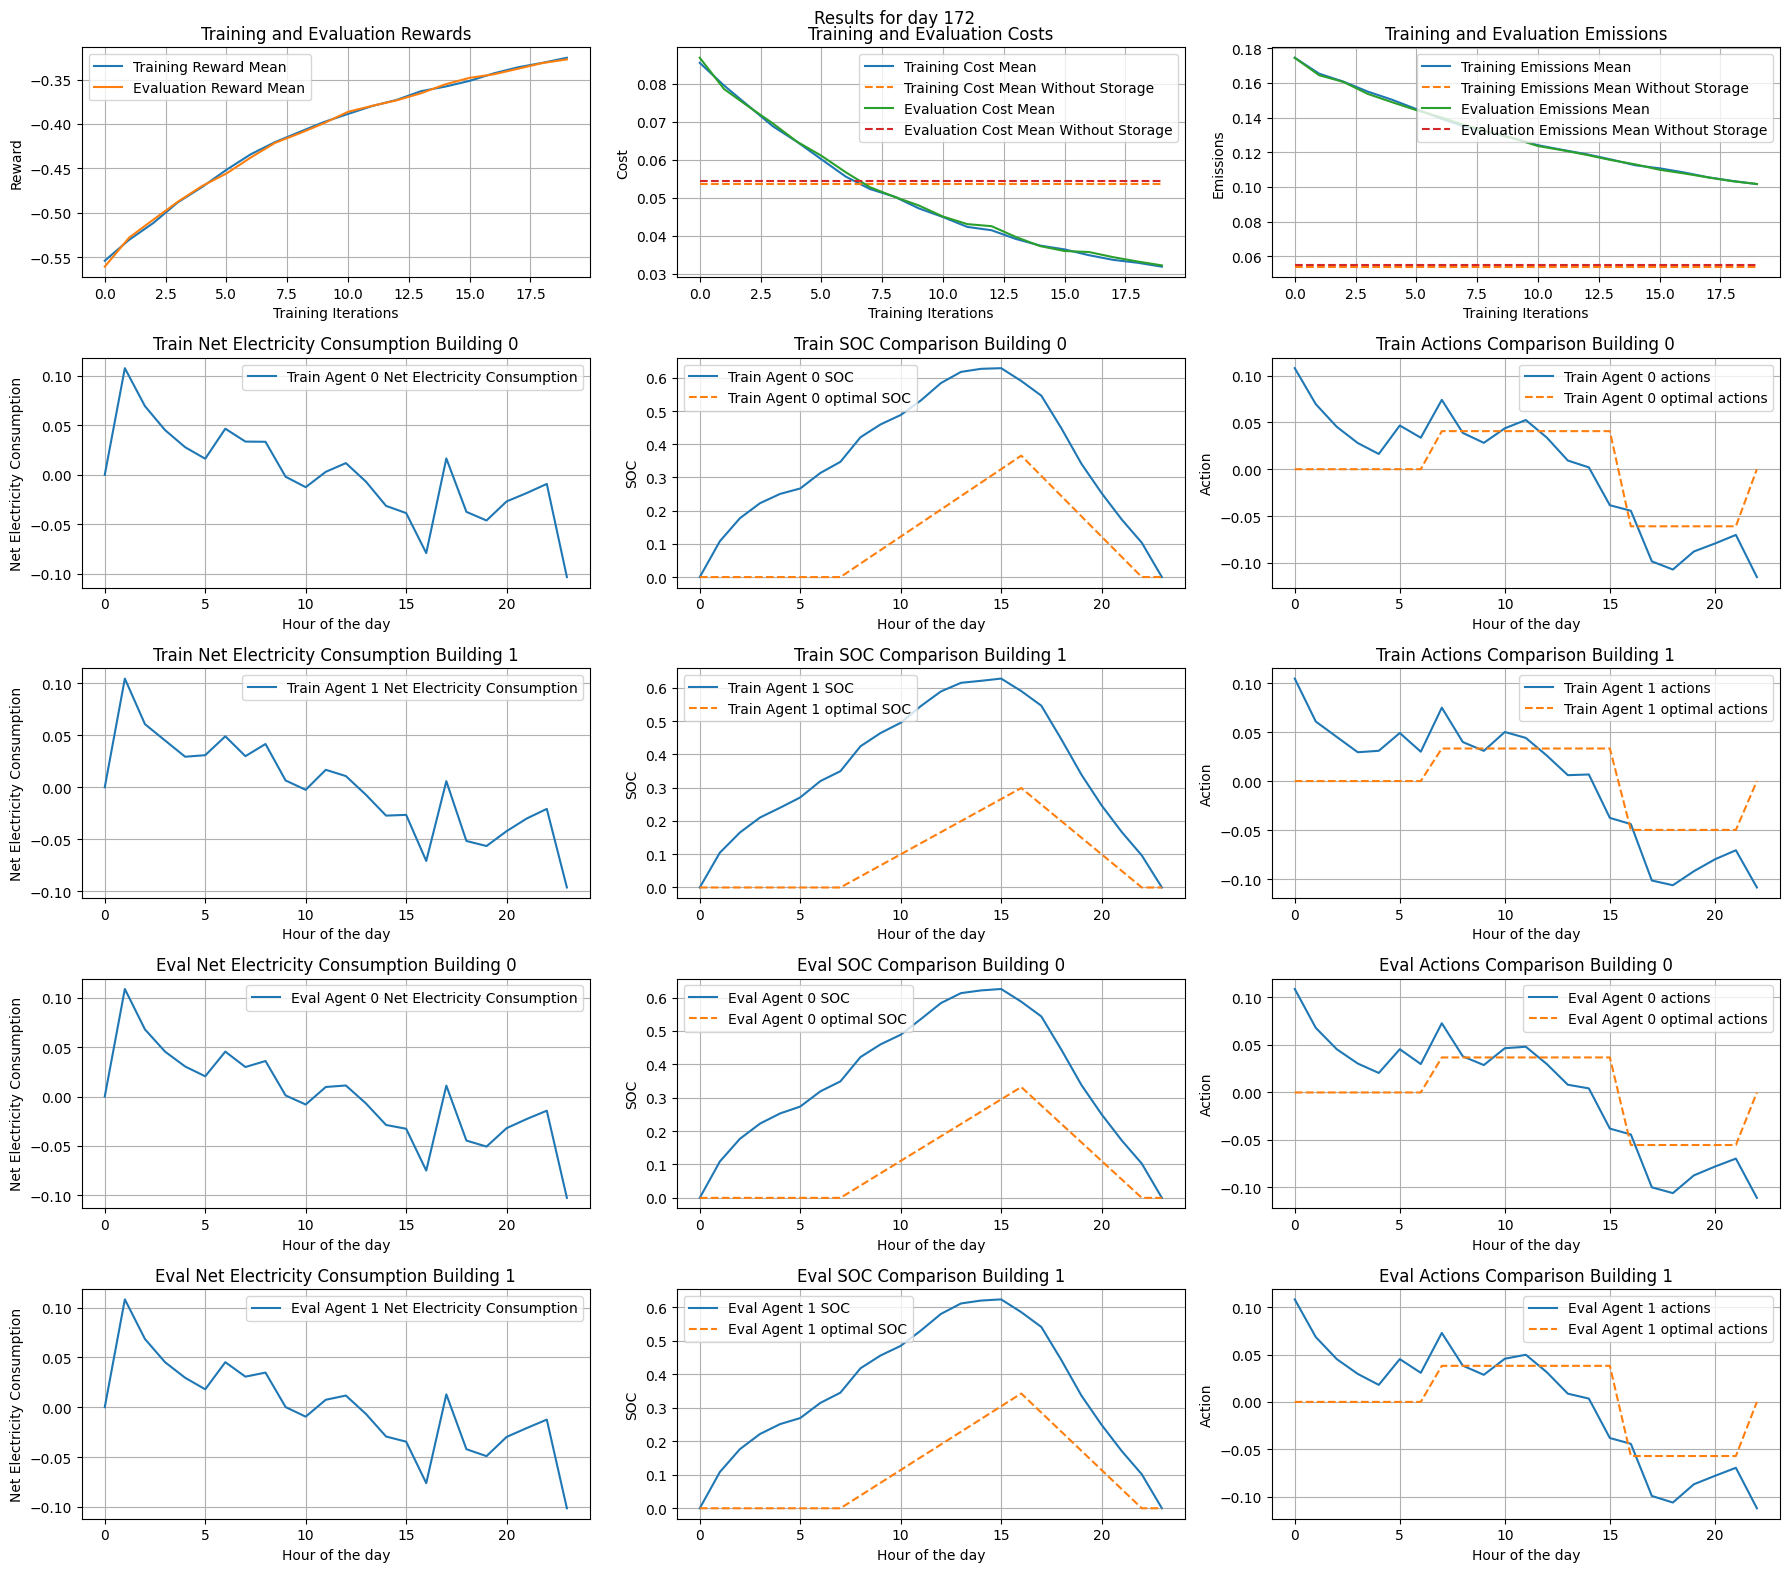

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

In [11]:
import copy

bu_policy = copy.deepcopy(policy)

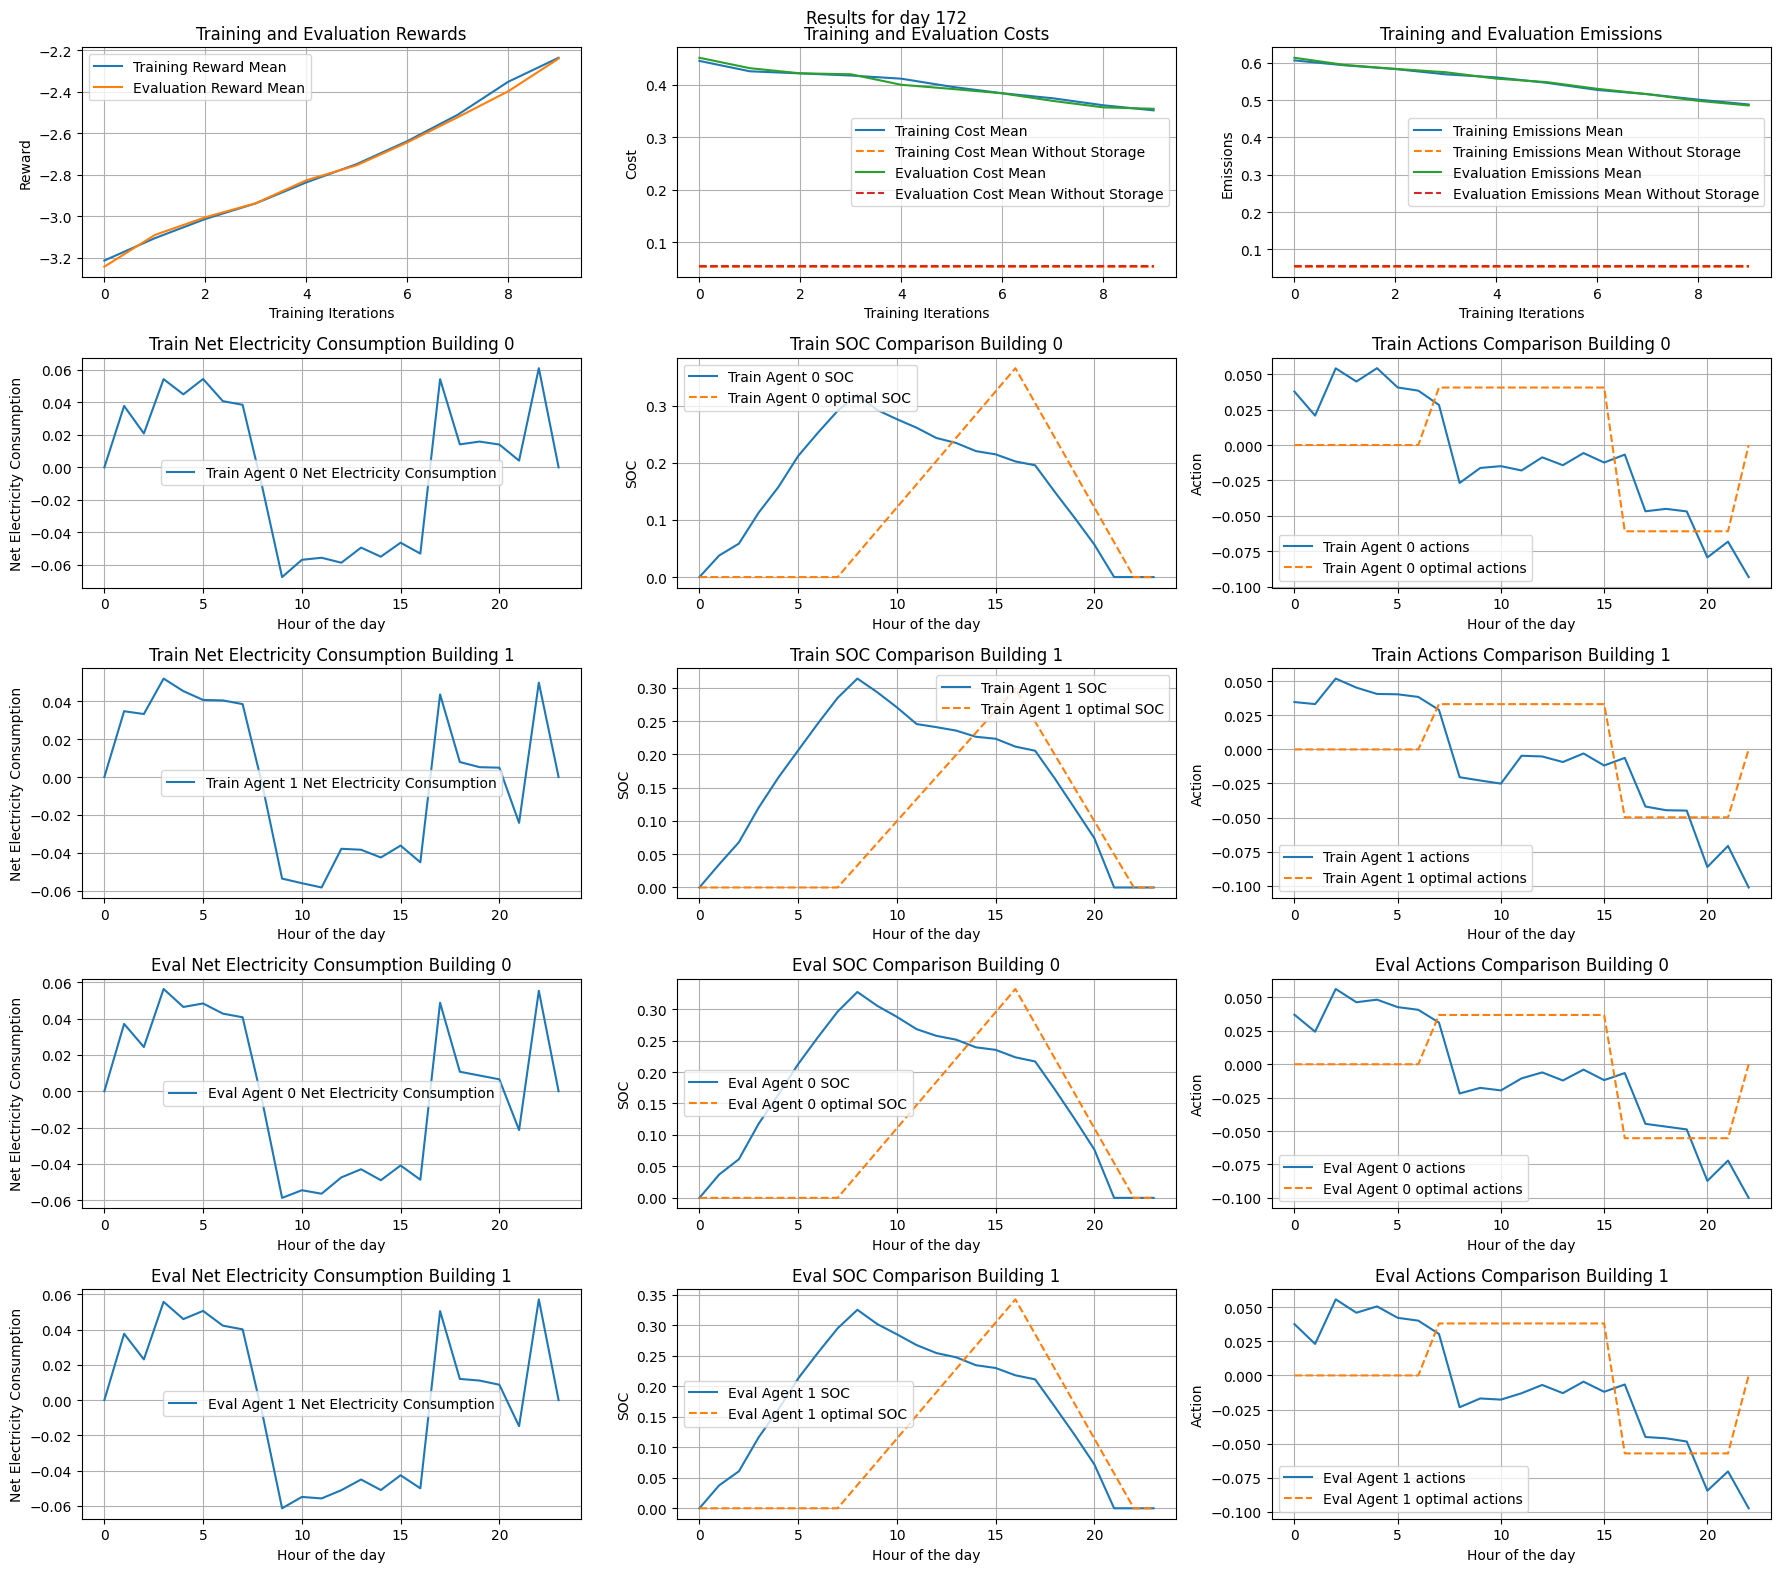

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

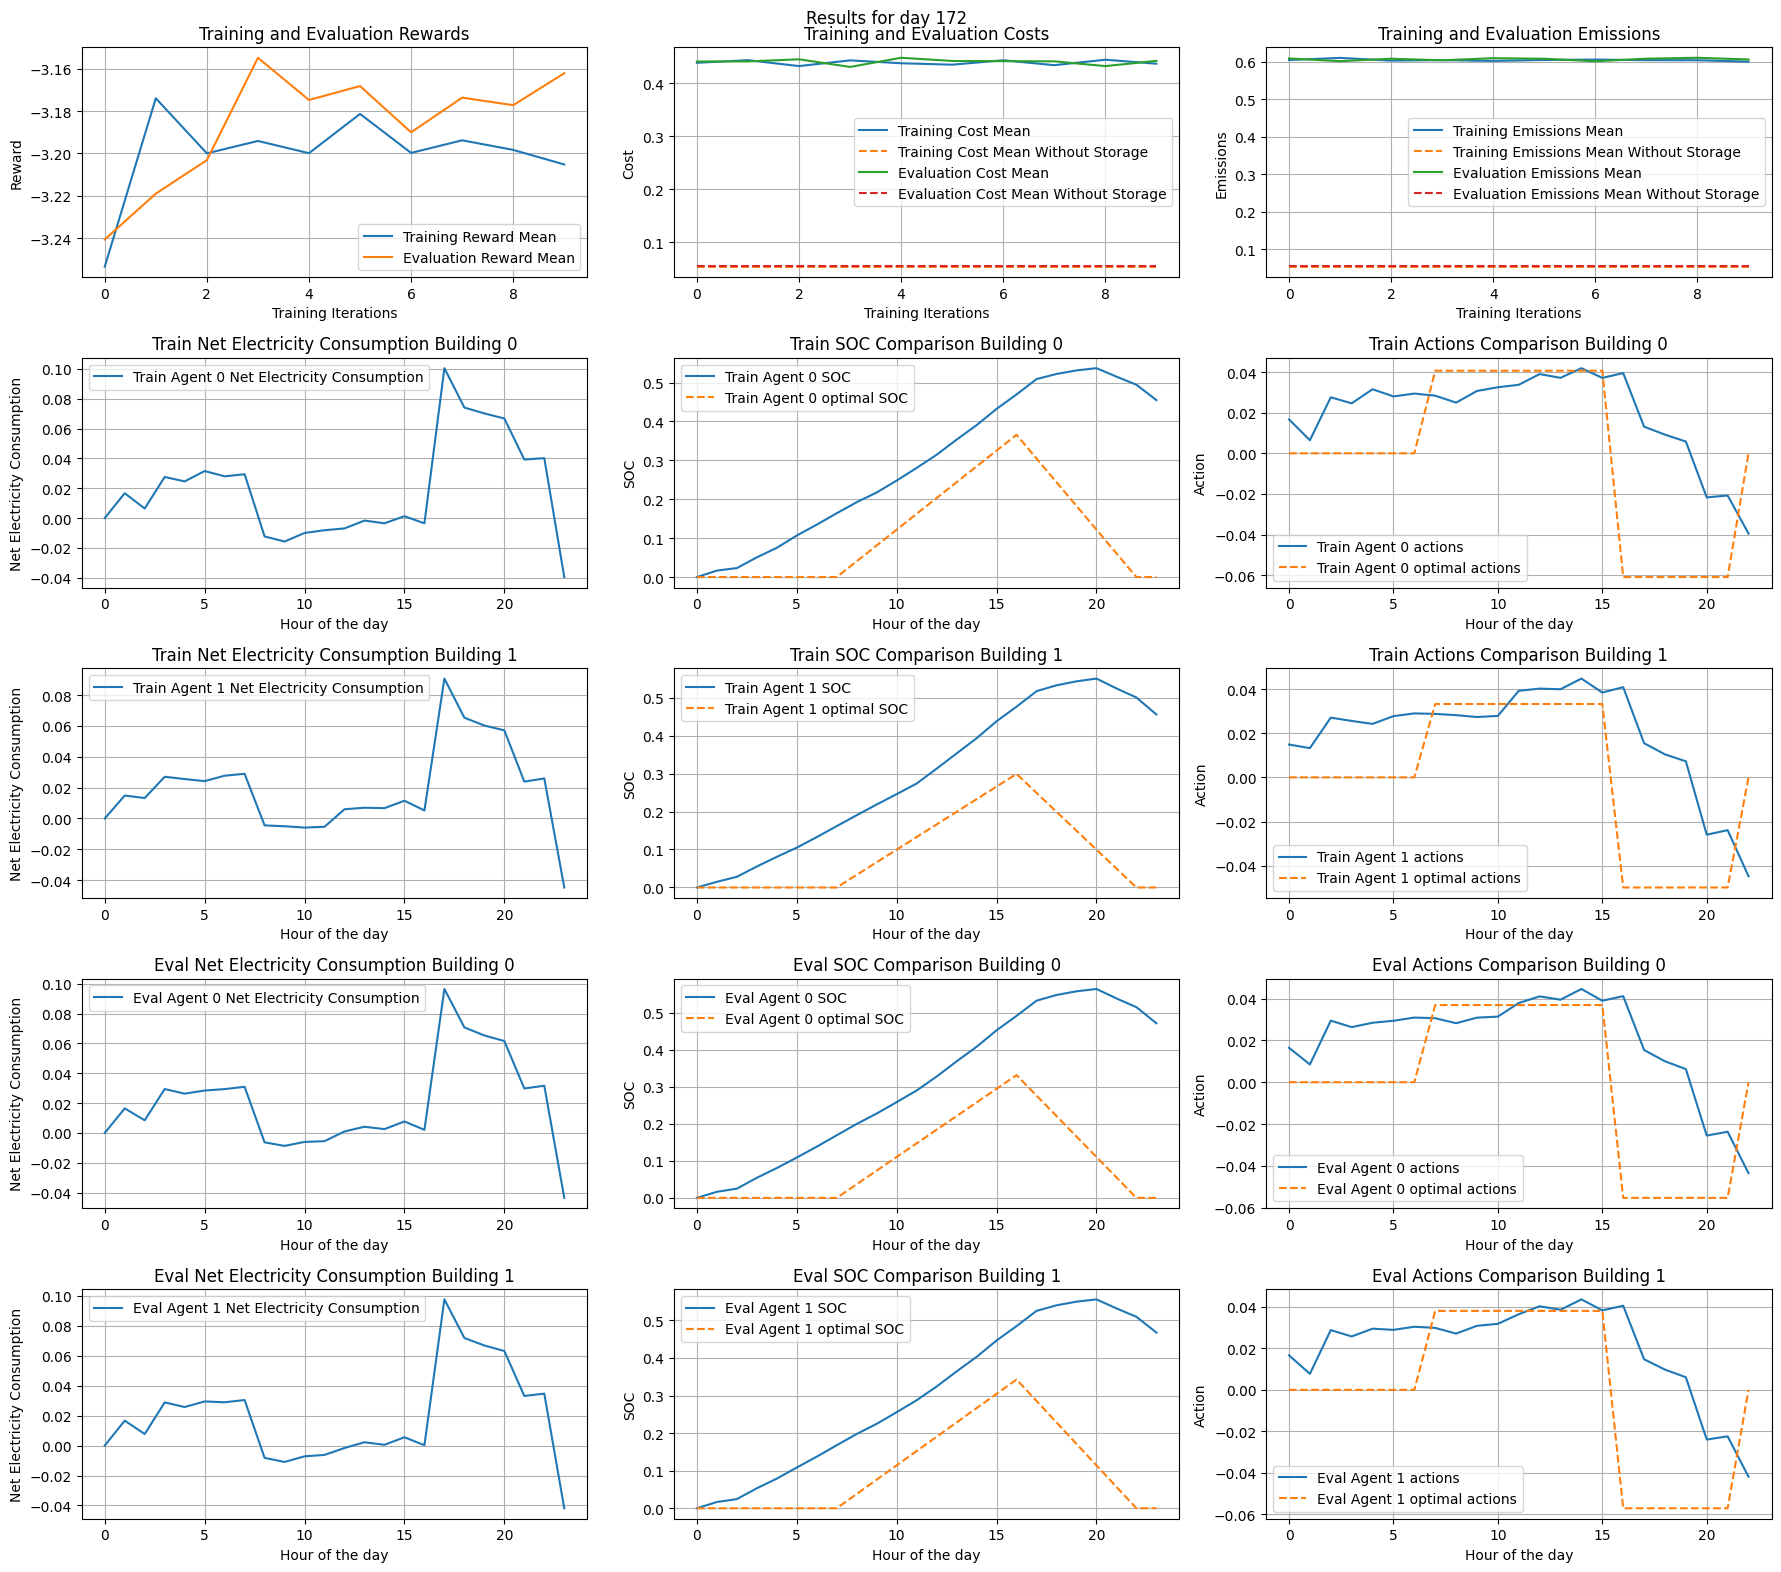

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
    save_path='logs/',
)

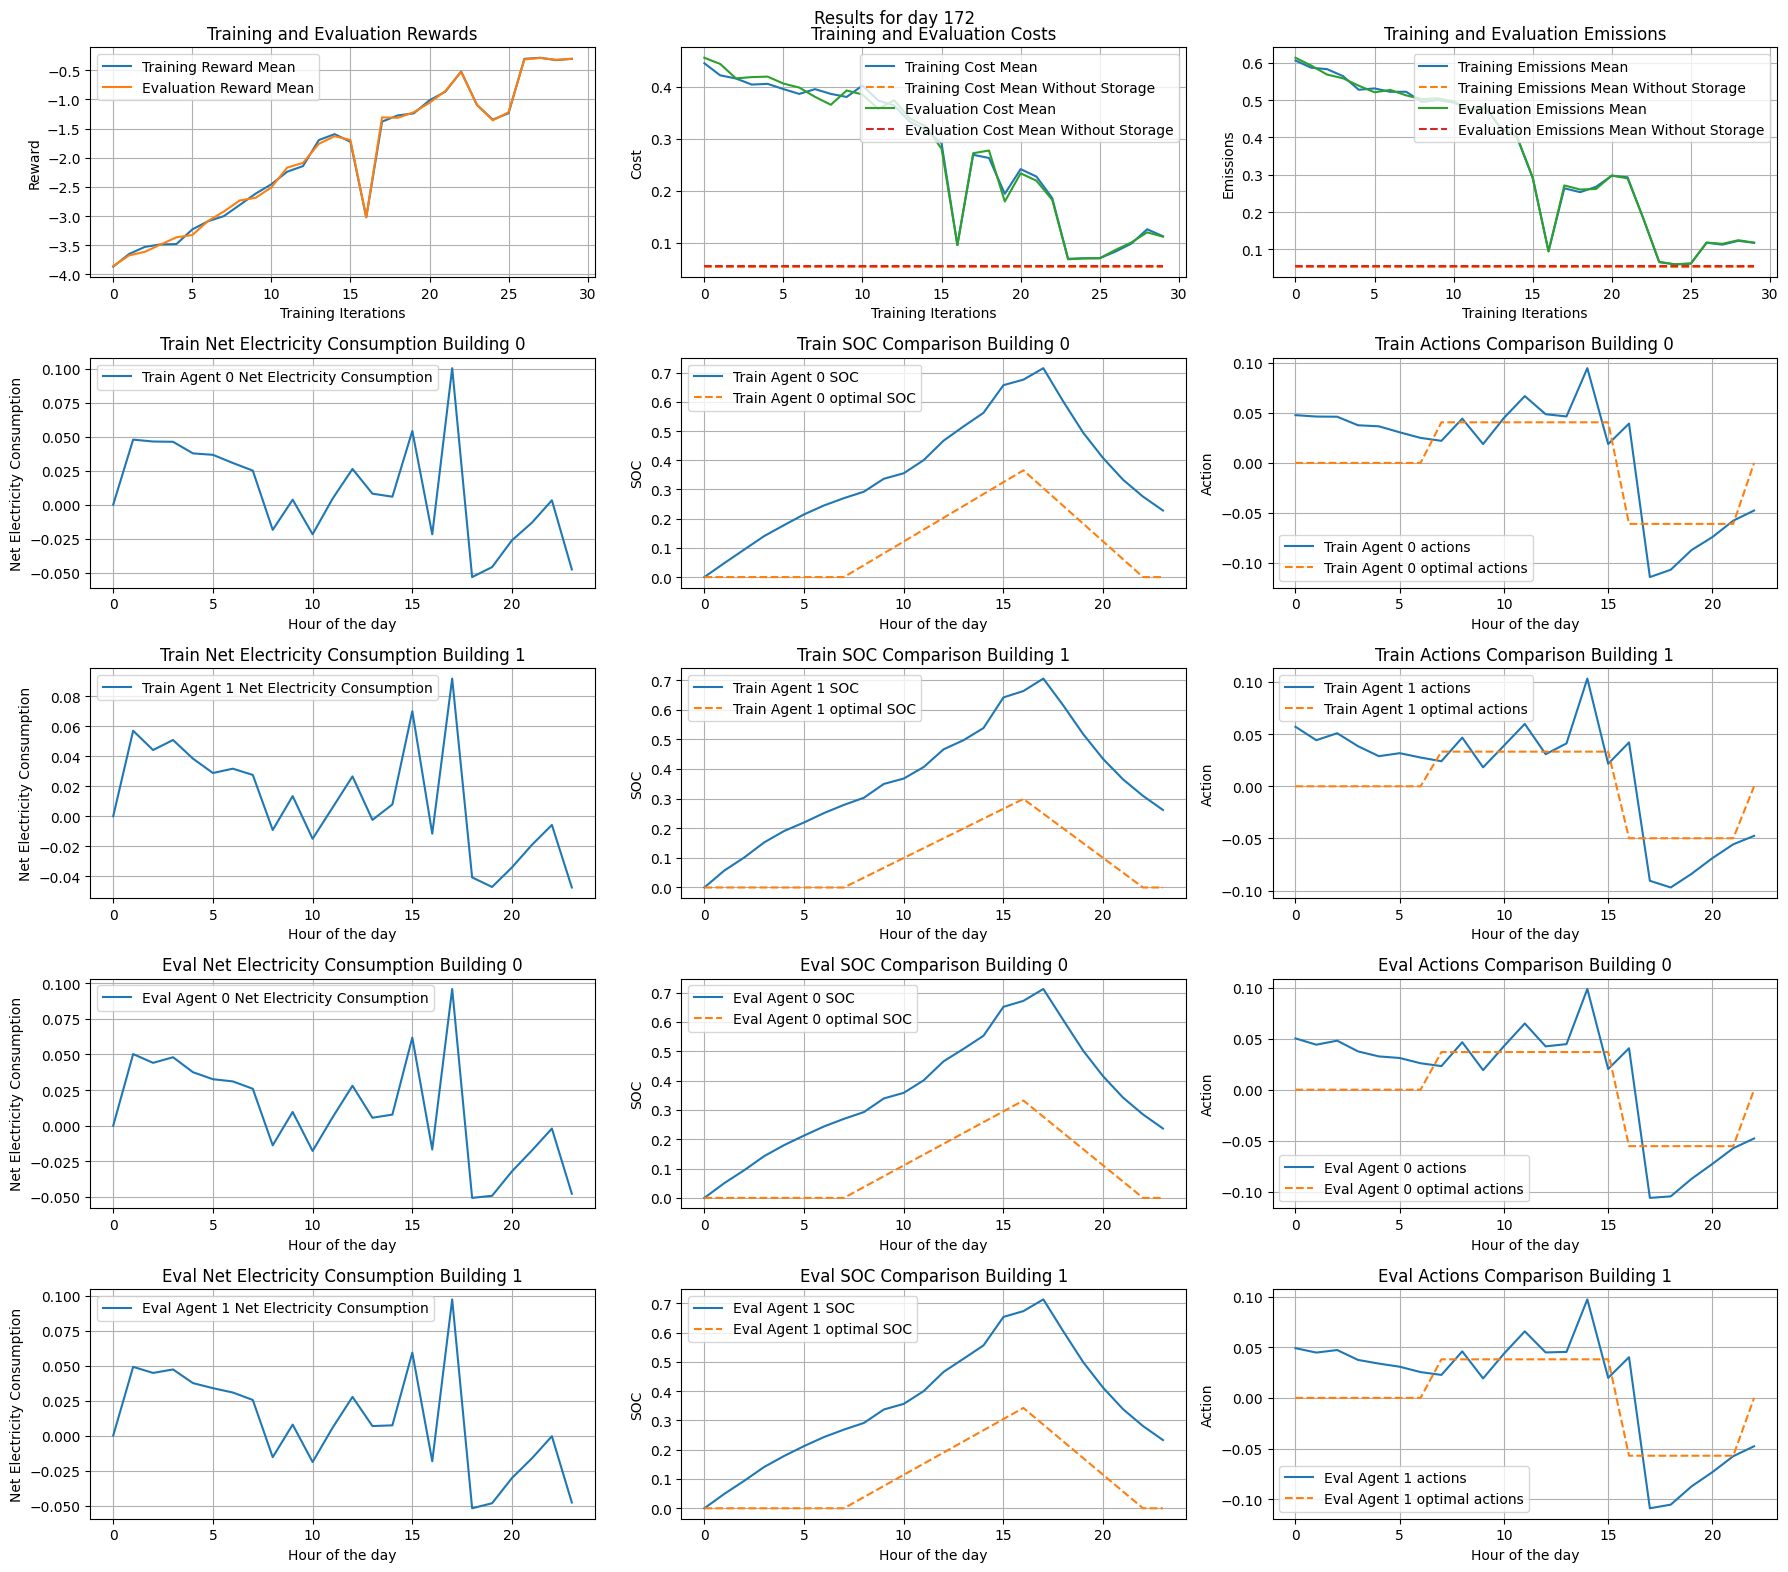

In [ ]:
plot_rewards_and_actions(
    policy=policy,
    train_env=train_env,
    eval_env=eval_env,
    summary=summary,
)